# Data Analysis Bike Sales in Europe

In [1]:
# import library python

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Membaca data Bike Sales

data = pd.read_csv(r'C:\Users\acer\Downloads\Kaggle\Bike Sales.csv')
data.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
# Melihat jumlah baris dan kolom

data.shape

(113036, 18)

In [4]:
# Melihat nama kolom yang terdapat pada data

data.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [5]:
# Melihat informasi dari data Bike Sales

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [6]:
# Melihat jumlah data kosong yang terdapat pada tiap kolom

data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [7]:
# Melihat jumlah data yang unik tiap kolomnya

data.nunique()

Date                1884
Day                   31
Month                 12
Year                   6
Customer_Age          70
Age_Group              4
Customer_Gender        2
Country                6
State                 53
Product_Category       3
Sub_Category          17
Product              130
Order_Quantity        32
Unit_Cost             34
Unit_Price            36
Profit              1256
Cost                 360
Revenue             1876
dtype: int64

In [8]:
# Melihat apakah ada data duplikat pada data Bike Sales

data.duplicated().values.any()

True

In [9]:
# Melihat jumlah data yang duplikat

data.duplicated().sum()

1000

In [10]:
# Menampilkan data yang duplikat

data[data.duplicated()].head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1093,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
1095,2015-10-24,24,October,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10,4,4,8
1193,2016-01-15,15,January,2016,42,Adults (35-64),M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,29,28,57


In [11]:
# Menghapus data duplikat dan melihat jumlah baris dan kolom setelah data duplikat dihapus

data.drop_duplicates(inplace=True)
data.shape

(112036, 18)

In [12]:
# Menghapus kolom Profit, Cost, Revenue

data= data.drop(['Profit','Cost','Revenue'], axis=1)

In [13]:
# Melihat jumlah baris dan kolom setelah menghapus kolom Profit, Cost, Revenue

data.shape

(112036, 15)

In [14]:
# Menghitung kolom Cost, Revenue, Profit yang baru dan menambahkan kolom tersebut ke dalam data Bike Sales

data['Cost'] = data['Order_Quantity'] * data['Unit_Cost']
data['Revenue'] = data['Order_Quantity'] * data['Unit_Price']
data['Profit'] = data['Revenue'] - data['Cost']
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1035,2760,1725
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,900,2400,1500
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,180,480,300


In [15]:
# Melihat statistik dari data Bike Sales

data.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,471.103333,845.162162,374.058829
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,886.971635,1469.637711,596.460858
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,28.000000,70.000000,39.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,112.000000,245.000000,138.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,442.000000,900.000000,435.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,42978.000000,69136.000000,26158.000000


## Penjualan Sepeda Berdasarkan Bulan

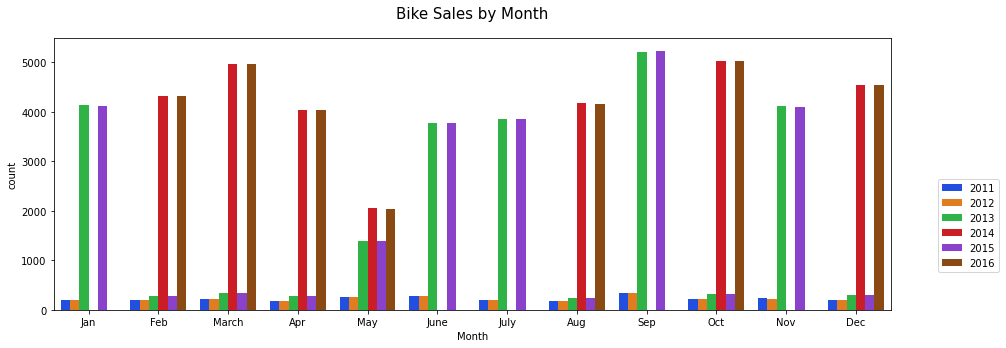

In [16]:
plt.subplots(figsize=(15,5))
label = ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(data = data, x='Month', hue='Year', palette='bright')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=label)
plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.title('Bike Sales by Month',fontdict={'fontsize': 15}, y = 1.05)
plt.show()

## Penjualan Sepeda Berdasarkan Country

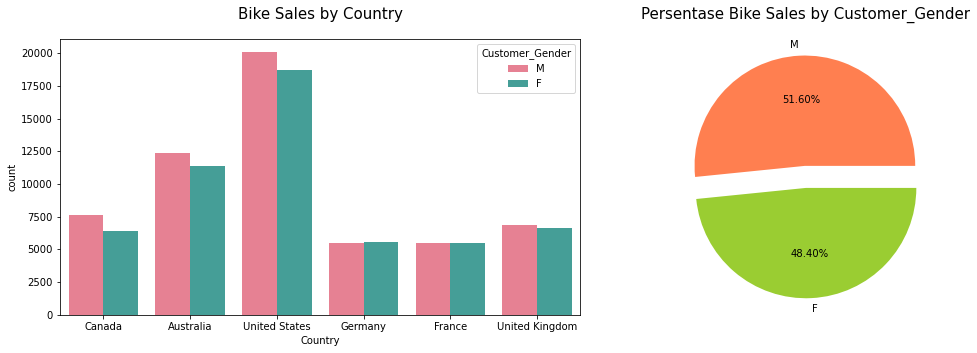

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=data, x='Country', hue='Customer_Gender', palette='husl')
plt.title('Bike Sales by Country',fontdict={'fontsize': 15}, y = 1.05)

plt.subplot(1,2,2)
data_gender= data['Customer_Gender'].value_counts()
label = [data_gender.index.tolist()]
plt.pie(data_gender,labels=label[0], autopct='%.2f%%', colors=('coral','yellowgreen'), explode=(0.1, 0.1))
plt.title('Persentase Bike Sales by Customer_Gender',fontdict={'fontsize': 15}, y = 1.05)

plt.tight_layout()
plt.show()

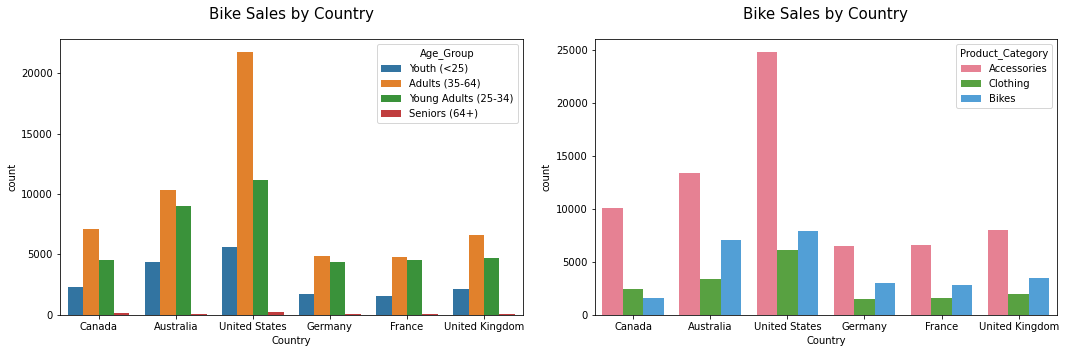

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=data, x='Country', hue='Age_Group')
plt.title('Bike Sales by Country',fontdict={'fontsize': 15}, y = 1.05)

plt.subplot(1,2,2)
sns.countplot(data=data, x='Country', hue='Product_Category', palette='husl')
plt.title('Bike Sales by Country',fontdict={'fontsize': 15}, y = 1.05)

plt.tight_layout()
plt.show()

## Penjualan Sepeda Berdasarkan Product Category

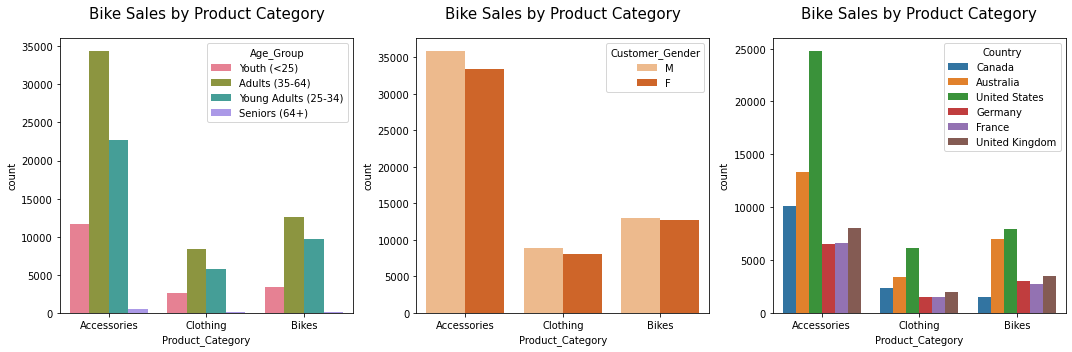

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(data=data, x='Product_Category', hue='Age_Group', palette='husl')
plt.title('Bike Sales by Product Category',fontdict={'fontsize': 15}, y = 1.05)

plt.subplot(1,3,2)
sns.countplot(data=data, x='Product_Category', hue='Customer_Gender', palette='Oranges')
plt.title('Bike Sales by Product Category',fontdict={'fontsize': 15}, y = 1.05)

plt.subplot(1,3,3)
sns.countplot(data=data, x='Product_Category', hue='Country')
plt.title('Bike Sales by Product Category',fontdict={'fontsize': 15}, y = 1.05)

plt.tight_layout()
plt.show()

### 

## Total Profit berdasarkan Tahun

In [20]:
data.groupby(['Year'])['Profit'].sum()

Year
2011    3976543
2012    4047960
2013    7687922
2014    7361372
2015    9870012
2016    8964246
Name: Profit, dtype: int64

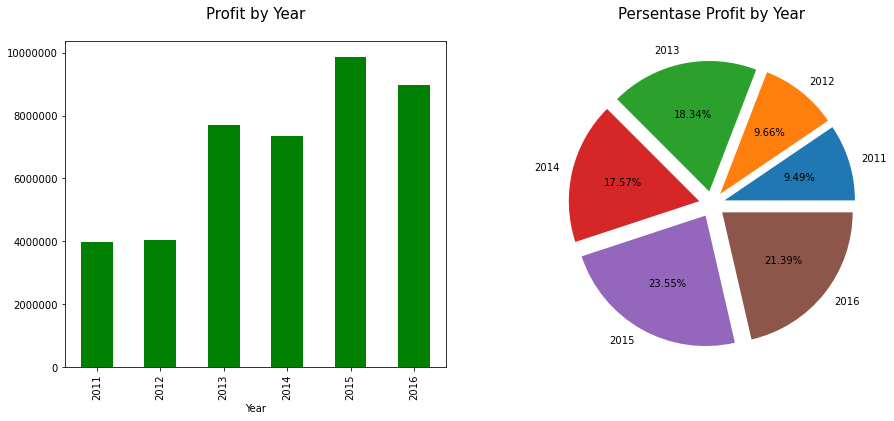

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
data.groupby(['Year'])['Profit'].sum().plot(kind='bar', color='green')
plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Profit by Year',fontdict={'fontsize': 15}, y = 1.05)

plt.subplot(1,2,2)
data_year= data.groupby(['Year'])['Profit'].sum()
label = [data_year.index.tolist()]
plt.pie(data_year,labels=label[0], autopct='%.2f%%', explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Persentase Profit by Year',fontdict={'fontsize': 15}, y = 1.05)

plt.show()

## Total Profit berdasarkan Age Group & Customer Gender

In [22]:
data.groupby(['Age_Group'])['Profit'].sum()

Age_Group
Adults (35-64)          20954599
Seniors (64+)             169195
Young Adults (25-34)    14952104
Youth (<25)              5832157
Name: Profit, dtype: int64

In [23]:
data.groupby(['Customer_Gender'])['Profit'].sum()

Customer_Gender
F    20526745
M    21381310
Name: Profit, dtype: int64

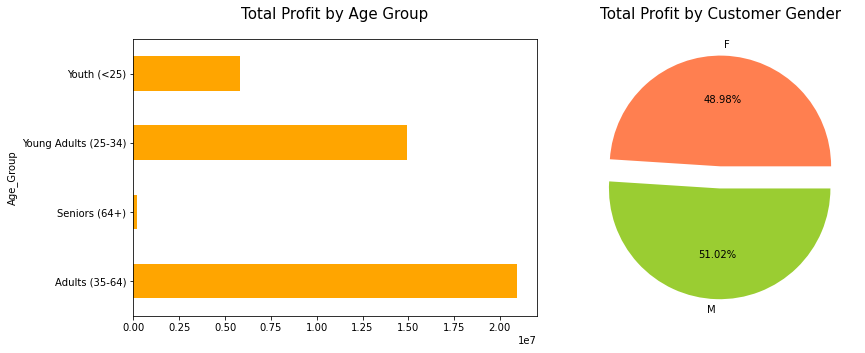

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data.groupby(['Age_Group'])['Profit'].sum().plot(kind='barh', color='orange')
plt.gcf().set_size_inches(13,5)
plt.title('Total Profit by Age Group',fontdict={'fontsize': 15}, y = 1.05)

plt.subplot(1,2,2)
data_gender= data.groupby(['Customer_Gender'])['Profit'].sum()
label = [data_gender.index.tolist()]
plt.pie(data_gender,labels=label[0], autopct='%.2f%%', colors=('coral','yellowgreen'), explode=(0.1, 0.1))
plt.title('Total Profit by Customer Gender',fontdict={'fontsize': 15}, y = 1.05)

plt.tight_layout()
plt.show()

## Total Profit berdasarkan Country & Product Category

In [25]:
data.groupby(['Country'])['Profit'].sum()

Country
Australia         10847833
Canada             3780531
France             4283045
Germany            4351687
United Kingdom     4824853
United States     13820106
Name: Profit, dtype: int64

In [26]:
data.groupby(['Product_Category'])['Profit'].sum()

Product_Category
Accessories    10391205
Bikes          27793169
Clothing        3723681
Name: Profit, dtype: int64

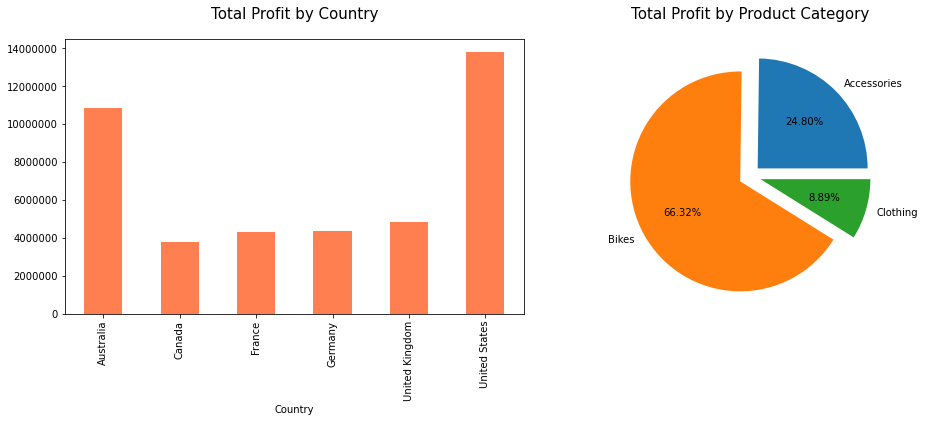

In [27]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
data.groupby(['Country'])['Profit'].sum().plot(kind='bar', color='coral')
plt.ticklabel_format(style='plain', axis = 'y')
plt.gcf().set_size_inches(14,6)
plt.title('Total Profit by Country',fontdict={'fontsize': 15}, y = 1.05)

plt.subplot(1,2,2)
data_product= data.groupby(['Product_Category'])['Profit'].sum()
label = [data_product.index.tolist()]
plt.pie(data_product,labels=label[0], autopct='%.2f%%', explode=(0.1, 0.1, 0.1))
plt.title('Total Profit by Product Category',fontdict={'fontsize': 15}, y = 1.05)

plt.tight_layout()
plt.show()

## Sebaran Profit Berdasarkan Customer Age

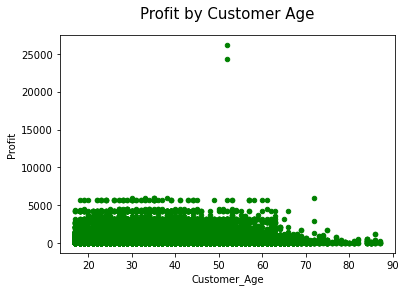

In [28]:
data.plot(kind='scatter', x='Customer_Age', y='Profit', color='green')
plt.title('Profit by Customer Age',fontdict={'fontsize': 15}, y = 1.05)
plt.show()

## Total Revenue berdasarkan Year

In [29]:
data.groupby(['Year'])['Revenue'].sum()

Year
2011    10051324
2012    10243236
2013    16892817
2014    15583042
2015    22318354
2016    19599815
Name: Revenue, dtype: int64

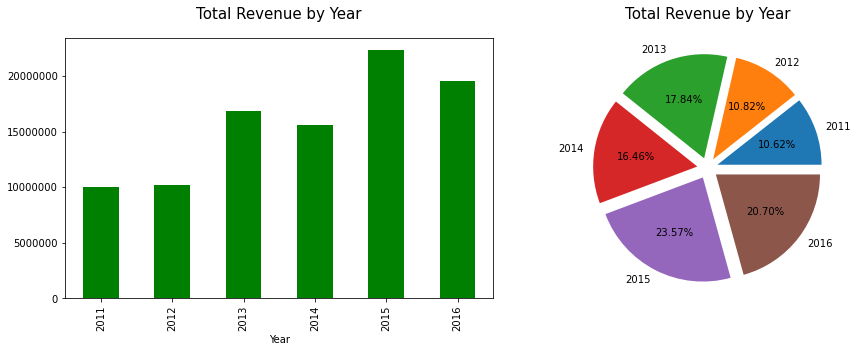

In [30]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
data.groupby(['Year'])['Revenue'].sum().plot(kind='bar', color='green')
plt.gcf().set_size_inches(13,5)
plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Total Revenue by Year',fontdict={'fontsize': 15}, y = 1.05)

plt.subplot(1,2,2)
data_year= data.groupby(['Year'])['Revenue'].sum()
label = [data_year.index.tolist()]
plt.pie(data_year,labels=label[0], autopct='%.2f%%', explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Total Revenue by Year',fontdict={'fontsize': 15}, y = 1.05)

plt.tight_layout()
plt.show()

## Total Revenue berdasarkan Age Group & Country

In [31]:
data.groupby(['Age_Group'])['Revenue'].sum()

Age_Group
Adults (35-64)          47086840
Seniors (64+)             338656
Young Adults (25-34)    34104452
Youth (<25)             13158640
Name: Revenue, dtype: int64

In [32]:
data.groupby(['Country'])['Revenue'].sum()

Country
Australia         25303706
Canada             7984694
France             9825708
Germany            9958420
United Kingdom    11016494
United States     30599566
Name: Revenue, dtype: int64

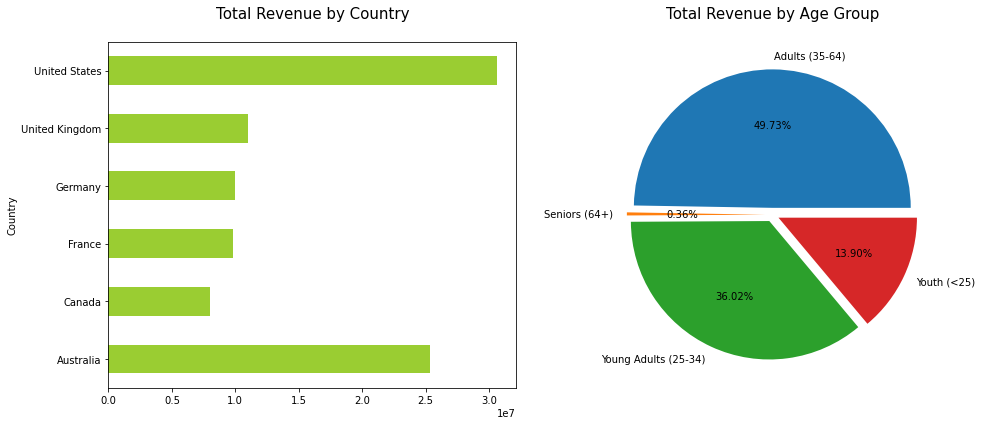

In [33]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
data.groupby(['Country'])['Revenue'].sum().plot(kind='barh', color='yellowgreen')
plt.gcf().set_size_inches(14,6)
plt.title('Total Revenue by Country',fontdict={'fontsize': 15}, y = 1.05)

plt.subplot(1,2,2)
data_age = data.groupby(['Age_Group'])['Revenue'].sum()
label = [data_age.index.tolist()]
plt.pie(data_age, labels=label[0], autopct='%.2f%%', explode=(0.05, 0.05, 0.05, 0.05))
plt.title('Total Revenue by Age Group',fontdict={'fontsize': 15}, y = 1.05)

plt.tight_layout()
plt.show()

## Total Revenue Berdasarkan Product Category & Sub Category

In [34]:
data.groupby(['Sub_Category'])['Revenue'].sum()

Sub_Category
Bike Racks             568920
Bike Stands            381609
Bottles and Cages     1536207
Caps                   605396
Cleaners               220644
Fenders               1366238
Gloves                 959398
Helmets               6353270
Hydration Packs       1094130
Jerseys               4566082
Mountain Bikes       23572163
Road Bikes           37221813
Shorts                1901760
Socks                  161664
Tires and Tubes       5085759
Touring Bikes         8033951
Vests                 1059584
Name: Revenue, dtype: int64

In [35]:
data.groupby(['Product_Category'])['Revenue'].sum()

Product_Category
Accessories    16606777
Bikes          68827927
Clothing        9253884
Name: Revenue, dtype: int64

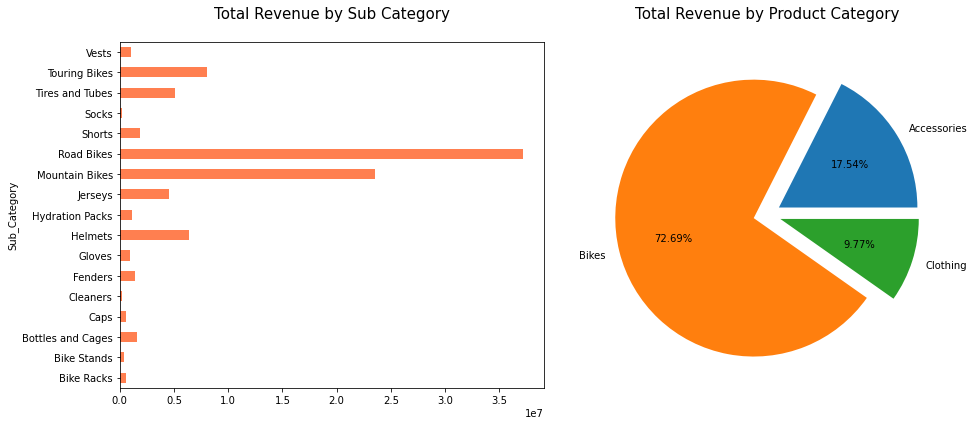

In [36]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
data.groupby(['Sub_Category'])['Revenue'].sum().plot(kind='barh', color='coral')
plt.gcf().set_size_inches(14,6)
plt.title('Total Revenue by Sub Category',fontdict={'fontsize': 15}, y = 1.05)

plt.subplot(1,2,2)
data_product = data.groupby(['Product_Category'])['Revenue'].sum()
label = [data_product.index.tolist()]
plt.pie(data_product, labels=label[0], autopct='%.2f%%', explode=(0.1, 0.1, 0.1))
plt.title('Total Revenue by Product Category',fontdict={'fontsize': 15}, y = 1.05)

plt.tight_layout()
plt.show()

### 

## Kesimpulan

1. Laki-laki merupakan konsumen terbanyak dalam penjualan sepeda di Eropa pada tahun 2011-2016 dengan persentase sebesar  51,60%.
Akan tetapi untuk total profit, konsumen perempuan memiliki total profil lebih besar dibandingkan customer laki-laki.

2. konsumen tertinggi adalah kelompok usia Adults (35-64) tahun, sedangkan konsumen terendah adalah kelompok usia Senior (64+) tahun.

3. Negara dengan konsumen tertinggi adalah negara United States dan negara dengan konsumen terendah adalah negara Germany dan France.

4. Product Category yang paling banyak dibeli oleh konsumen adalah Accessories, sedangkan product category paling sedikit dibeli oleh konsumen adalah Clothing.

5. Total profit tertinggi dalam penjualan sepeda di Eropa pada tahun 2011-2016 diperoleh pada tahun 2015 sebesar 23.40%.